# Line_Empty_EGFP_MJHW9_ANAT0015

# README

## Dataset

The dataset `LineIntensity_Empty_EGFP.xlsx` includes fluorescence intensity measurements of **unfused EGFP** in B16F1 melanoma cells, taken along a linear path from the cell edge toward the interior. Only **lines 1–3** were used (representing early timepoints or lamellipodial fronts), and distances were restricted to within 6 μm from the membrane.

## Processing Workflow

1. **Filtering**: Only intensity values within 6 μm of the membrane were retained.  

2. **Averaging**: The average of LT1–3 was calculated as `LT123Ave`.  

3. **Cell-wise Normalization**: For each cell, intensity was normalized to its own maximum.  

4. **Global Normalization**: For population average curve, values were normalized to the global max intensity.  

5. **Plotting**: A mean ± SEM intensity line plot across distance (0–6 μm) was generated.

# Coding Script

## Data Import

In [1]:
# Package Import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data Import
LineIntensity_Empty_EGFP = pd.read_excel("LineIntensity_Empty_EGFP.xlsx", sheet_name="Sheet1")

## Cleaning and Preprocessing

In [3]:
# Convert CellNo to Str
LineIntensity_Empty_EGFP["CellNo"] = (
    LineIntensity_Empty_EGFP["CellNo"]
    .astype("string")                   
    .str.replace(r"\.0$", "", regex=True) 
)

In [4]:
# Filter Distance ≤ 6 μm 
LineIntensity_Empty_EGFP = LineIntensity_Empty_EGFP[LineIntensity_Empty_EGFP["Distance"] <= 6].copy()

In [5]:
# Calculate Average Intensity
LineIntensity_Empty_EGFP["LT123Ave"] = LineIntensity_Empty_EGFP[["LT1", "LT2", "LT3"]].mean(axis=1, skipna=True)

In [6]:
# Percentage Intensity
max_lt123_per_cell = LineIntensity_Empty_EGFP.groupby("CellNo")["LT123Ave"].transform("max")
LineIntensity_Empty_EGFP["LT123AvePer"] = LineIntensity_Empty_EGFP["LT123Ave"] / max_lt123_per_cell

## Visulisation

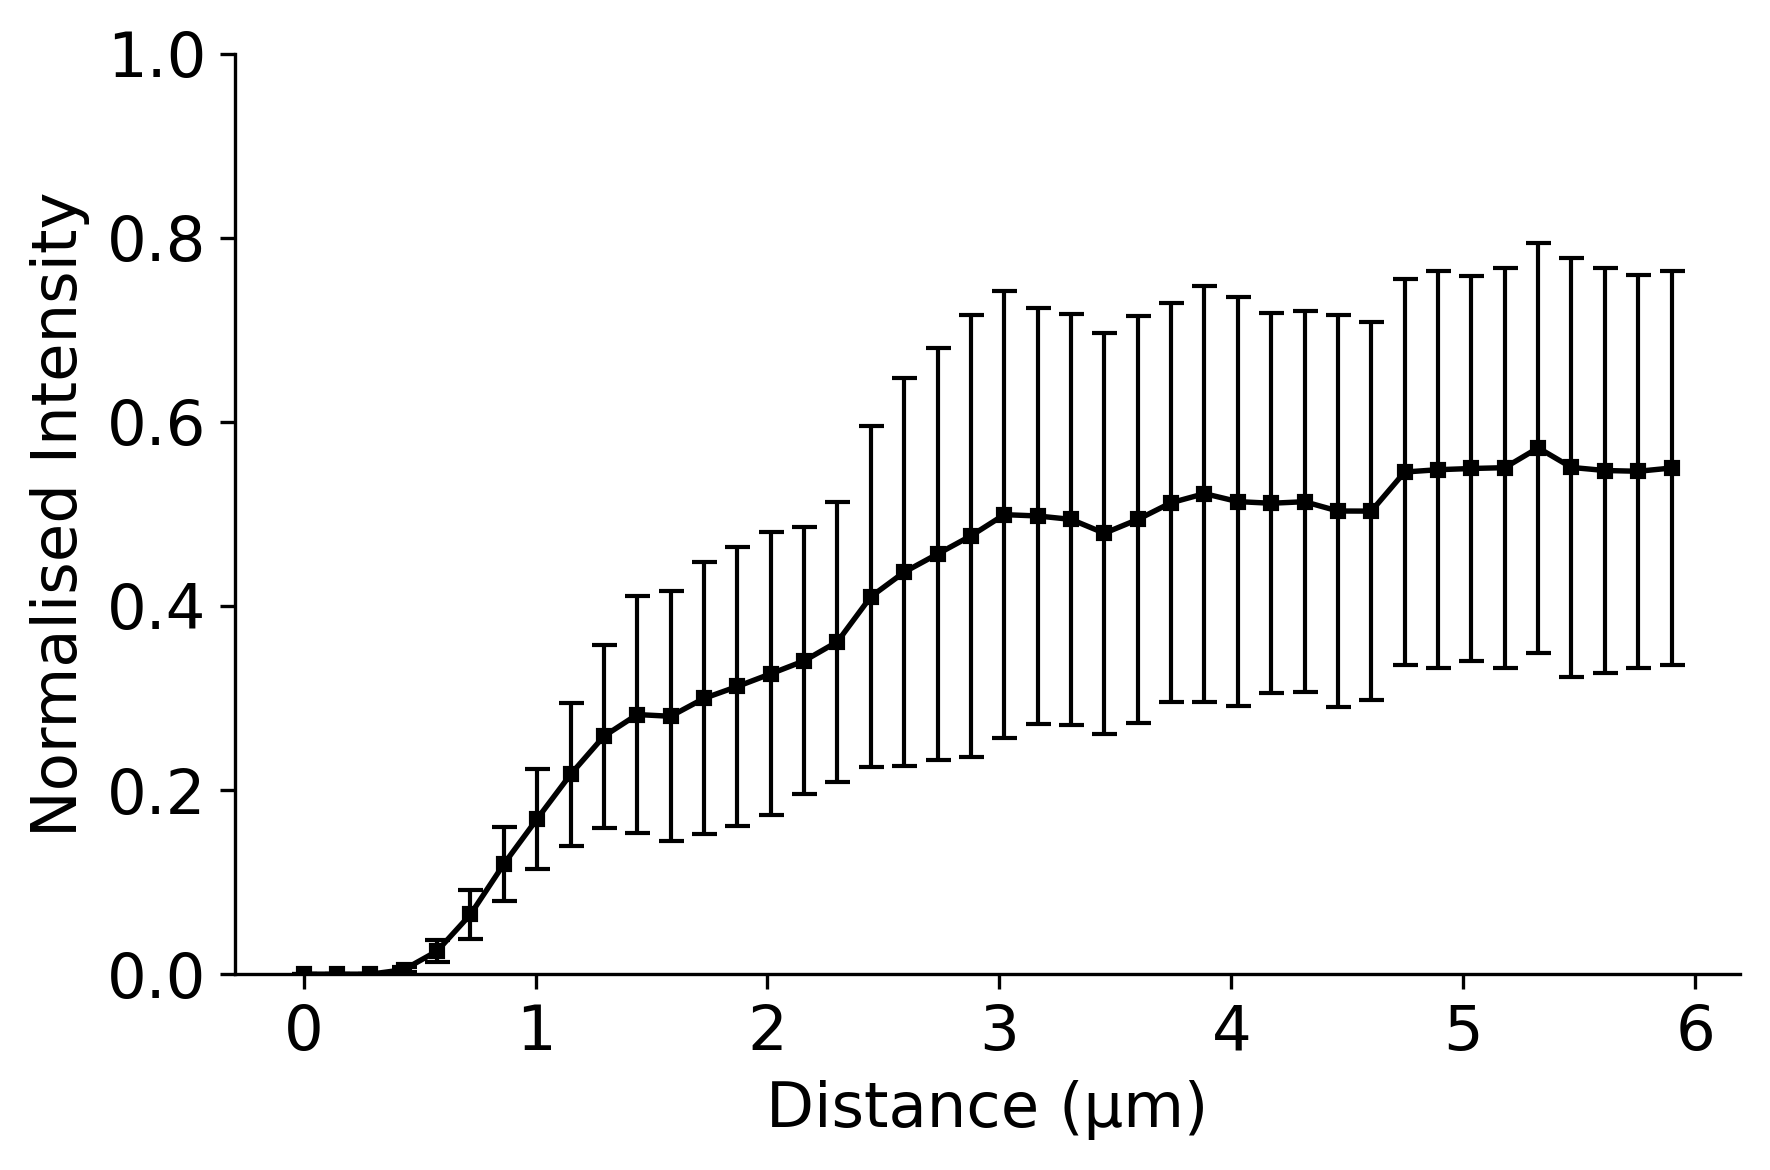

In [7]:
# Plot the intensity-distance curve for the EGFP-only-expressing cell as a positive control

LineIntensity_Empty_EGFP["CellNo"] = LineIntensity_Empty_EGFP["CellNo"].astype(str)

# Normalise to max
global_max = LineIntensity_Empty_EGFP["LT123Ave"].max()

# Calculate Mean and sem 
grouped = LineIntensity_Empty_EGFP.groupby("Distance")["LT123Ave"]
avg = grouped.mean() / global_max
sem = grouped.sem() / global_max

# Convert to df
avg_lt123_by_distance = avg.reset_index()
avg_lt123_by_distance["SEM"] = sem.values

# Plotting
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

ax.errorbar(
    avg_lt123_by_distance["Distance"],
    avg_lt123_by_distance["LT123Ave"],
    yerr=avg_lt123_by_distance["SEM"],
    fmt='s-',                
    capsize=3,
    linewidth=1.3,
    markersize=3,
    color='black',
    ecolor='black',
    elinewidth=1
)

# ✅ 图形美化
ax.set_xlabel("Distance (µm)", fontsize=15)
ax.set_ylabel("Normalised Intensity", fontsize=15)
ax.set_ylim(0, 1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='both', labelsize=15)
ax.grid(False)

plt.tight_layout()
plt.savefig("SVG/LT_Empty_EGFP_W2.png", dpi=600, bbox_inches='tight', transparent=True)
plt.show()